# Function generator with noisy data

In [1]:
from numpy.random import seed

#from tensorflow import set_random_seed
#set_random_seed(234)

import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
import scipy

import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Layer, InputSpec, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers, activations, initializers, constraints, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.constraints import UnitNorm, Constraint

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#f = lambda x,y:x**2/(x**2+x*y)
f = lambda x:np.sin(x)

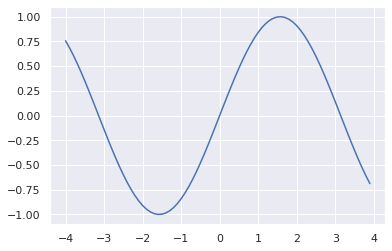

In [4]:
x = np.arange(-4, 4, 0.1)
y = f(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

# Training Data

Unlike the noiseless example, we will use fewer samples and add gaussian noise.

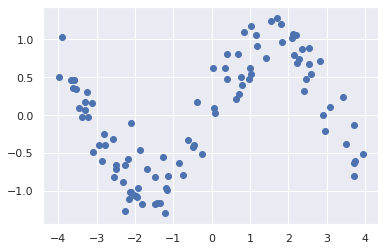

In [32]:
# Training Data (With Noise)
seed(420)
x_train = np.random.uniform(-4, 4, 100)
y_train = f(x_train)
y_train = y_train + 0.3 * np.random.normal(size=len(y_train))

train_in = np.array([x_train]).T
train_out = np.array([y_train]).T

# Test data
x_test = np.linspace(-4, 4, 1000)
y_test = f(x_test)
test_in = np.array([x_test]).T

# Plot Training Data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train)

Additionally, we increased the learning rate and switched to the `Adam` optimizer.

In [11]:
# Set up
nb_epoch = 100 #Number of runs
batch_size = 5
input_dim = 1 #Number of predictor variables,
learning_rate = 1e-2

# Batch and shuffle data
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_in, train_out)).shuffle(100).batch(batch_size)

# Optimizer
#opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Baseline
We first establish a baseline using a layer with 3 nodes. The network perform admirably, with good coverage over the data without overfitting.

We repeat the fitting with increasing width (20 nodes, 100 nodes) and as expected, the wider layer performed better in terms of minimizing loss. Additionally, the wider layer found the optimal fit more frequently than the narrower one for different initialization.

While not shown here, using a slower learning rate and `RMSprop` optimizer led to poor fitting generally.

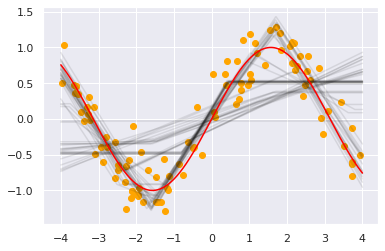

In [72]:
test_out=[]
for i in range(50):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(3, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt, loss='mse')
    model.fit(train_ds, epochs=50, verbose=0)
    test_out.append(model.predict(test_in).T[0])

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test,np.array(test_out).T, color=(0.1, 0.1, 0.1, 0.1))
ax.plot(x_test, y_test,color='red')
ax.scatter(x_train, y_train,color='orange')

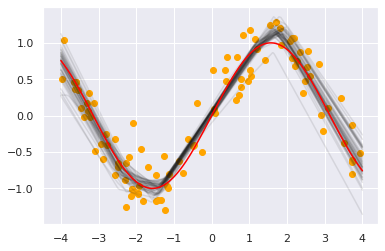

In [74]:
test_out=[]
for i in range(50):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(20, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt, loss='mse')
    model.fit(train_ds, epochs=50, verbose=0)
    test_out.append(model.predict(test_in).T[0])
    
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test,np.array(test_out).T, color=(0.1, 0.1, 0.1, 0.1))
ax.plot(x_test, y_test,color='red')
ax.scatter(x_train, y_train,color='orange')

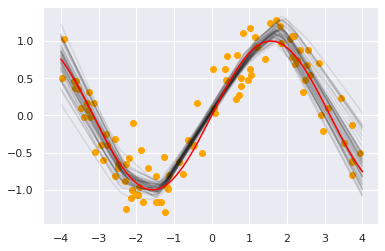

In [76]:
test_out=[]
for i in range(50):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt, loss='mse')
    model.fit(train_ds, epochs=50, verbose=0)
    test_out.append(model.predict(test_in).T[0])

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test,np.array(test_out).T, color=(0.1, 0.1, 0.1, 0.1))
ax.plot(x_test, y_test,color='red')
ax.scatter(x_train, y_train,color='orange')

# Deep Neural Net
One of the arguments supporting a deeper NN over a wider NN is that a deeper NN prevents overfitting, and each layer helps identify certain features. In the following example, the deep neural network performed poorly, with most fits being a straight line through the center.

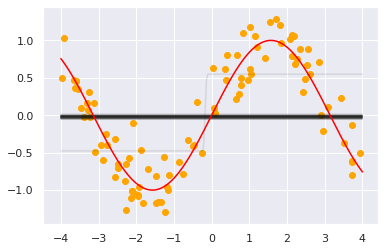

In [77]:
test_out=[]
for i in range(50):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(3, activation='relu', input_dim=1))
    for i in range(6):
        model.add(Dense(3, activation='relu'))
    #model.add(LeakyReLU(alpha=0.03))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt, loss='mse')
    model.fit(train_ds, epochs= 50, verbose=0)
    test_out.append(model.predict(test_in).T[0])

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test,np.array(test_out).T, color=(0.1, 0.1, 0.1, 0.1))
ax.plot(x_test, y_test,color='red')
ax.scatter(x_train, y_train,color='orange')

# Deep and wide

What if we use a neural net that is both deep and wide, with either ascending or descending width?

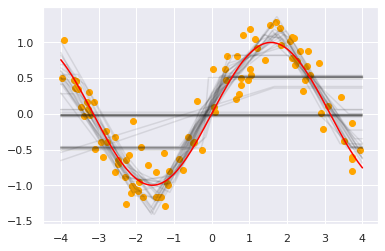

In [78]:
test_out=[]
for i in range(50):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(3, activation='relu', input_dim=1))
    model.add(Dense(6, activation='relu', input_dim=1))
    model.add(Dense(12, activation='linear'))
    model.compile(optimizer=opt, loss='mse')
    model.fit(train_ds, epochs= 50, verbose=0)
    test_out.append(model.predict(test_in).T[0])

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test,np.array(test_out).T, color=(0.1, 0.1, 0.1, 0.1))
ax.plot(x_test, y_test,color='red')
ax.scatter(x_train, y_train,color='orange')

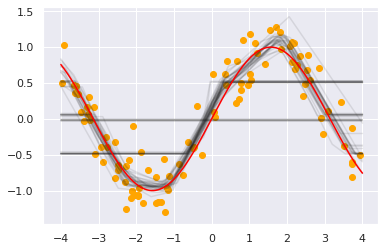

In [79]:
test_out=[]
for i in range(50):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(12, activation='relu', input_dim=1))
    model.add(Dense(6, activation='relu', input_dim=1))
    model.add(Dense(3, activation='linear'))
    model.compile(optimizer=opt, loss='mse')
    model.fit(train_ds, epochs= 50, verbose=0)
    test_out.append(model.predict(test_in).T[0])

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test,np.array(test_out).T, color=(0.1, 0.1, 0.1, 0.1))
ax.plot(x_test, y_test,color='red')
ax.scatter(x_train, y_train,color='orange')

# Insights and future work

When using NN as a function approximator, the results depend a lot on the initial conditions i.e.
1. There are many ways to fit the data that generates similar loss.
1. NN is a local optimizer and therefore unable to survey the full parameter landscape.
In contrast, when using NN as an autoencoder, the NN is able to find the optimal vector space that best minimizes MSE loss consistently regardless of initial condition.